# AIM : DETECTING SNOW COVER IN IMAGES FROM DAVOS SITE

*Davos (CH-DAV) is one of the longest running eddy covariance (EC) measurement stations in the world and part of many ongoing projects, e.g. ICOS. With the EC method, we measure the exchange of trace gases – in particular CO2 - between the biosphere and the atmosphere. These measurements are performed all-year-round, continuously. With these measurements, we can assess if the ecosystem takes up or emits carbon over the course of a year. CH-DAV is a forest and from past measurements we know that there is more carbon uptake than there is emission, i.e. the forest is a carbon sink and has a net cooling effect on climate. In order to properly analyse flux data, we need a lot of auxiliary measurements like e.g. air temperature and incoming radiation. One important variable that we need in our analyses is duration and depth of snow cover. At the site, we have a lot of webcam pictures that show snow cover and depth at various locations throughout the forest. These pictures are taken every few hours, every day, and contain valuable information that we would like to use in our analyses.*


## Imports



In [1]:
# import the necessary packages
import numpy as np
import cv2
import os
from pathlib import Path
import fnmatch
import matplotlib.pyplot as plt
import csv
from PIL import Image, ImageOps

## Analysing an image using rgb plots and histogram

https://www.youtube.com/watch?v=yM229XVkdOA
 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7832k  100 7832k    0     0  54.6M      0 --:--:-- --:--:-- --:--:-- 54.6M


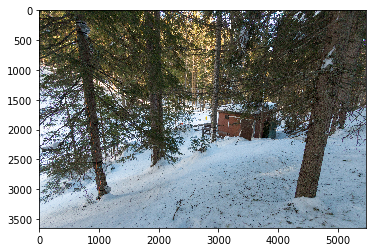

In [2]:
#importing the image from davos site
! curl -O https://www.swissfluxnet.ethz.ch/wp-content/gallery/ch-dav/20180131-IMG_1404.jpg
img=plt.imread('20180131-IMG_1404.jpg')
#displaying the image
plt.imshow(img)

## Histogram

*The histogram gives us information about how many bright and dark colors are shown in the picture. For example, if there is a lot of snow in the picture, there will be lots of bright color values in the image histogram. When looking at a histogram like this, the bright colors are on the right, the dark colors on the left. Pure white is on the very right end of the histogram, pure black on the very left side.*

*This histogram shows that there are quite a lot of bright colors (i.e. snow), but also a lot of dark colors (shown on the left side of the histogram; these are the dark forest color e.g. trunks…).*

*Normally we would expect snow to be completely white, but due to a certain setting in cameras that is often automated (white balance), white colors often come out of the camera with a certain tint. In this example, the snow looks very blue. This is why the bright colors are shifted towards the left in the histogram. If there was no blue tint the snow would be much closer to white and therefore the bright colors would be found closer to the right side of the histogram.*



Text(0.5, 1.0, ' HISTOGRAM FOR THE IMAGE ')

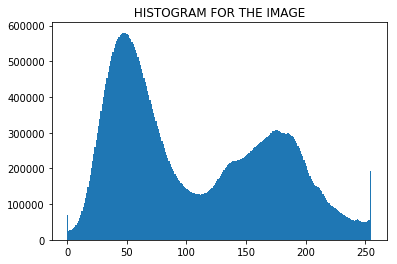

In [3]:
histogram=plt.hist(img.ravel(),bins=255)
plt.title(' HISTOGRAM FOR THE IMAGE ')

## Saving the histogram values to a csv file

In [4]:
q=np.array(histogram)
csvData = q[0],q[1]
with open('csv_file_for_one_image.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvData)

## RGB plot

*RGB plot gives us valuable information about the CO2 uptake/emission, more the green values, more the co2 uptake, less the emissions*

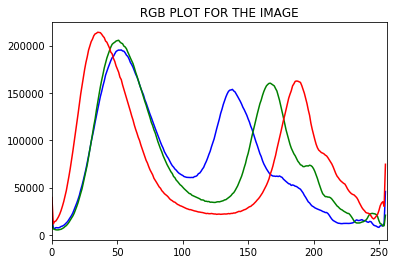

In [5]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.title(' RGB PLOT FOR THE IMAGE ')
    plt.xlim([0,256])

*Both histogram and RGB plot are really helpful in comparing the images, if we store the histogram points for various images in a csv file and compute the average value, then for every new image we can tell if it has more snow than the average in that month(say) or less, Same goes with RGB plots, we can tell if its more CO2 uptaker or less than the average.*

## Plotting Histograms and storing points for Jan. 2019 images from Grassland Server

*Using 5th Floor ChamberCam Images from Davos Site.*
*This analysis is done over 248 images and different colours in histogram are for different images, we can get an idea of how the average histogram would look like from this.*

In [6]:
#importing images from grassland server
dir_source = Path('//grasslandserver.ethz.ch/archive/FluxData/CH-DAV_Davos/90_images/40_chambercams/FF5/2019/01')
#note the forward slash

filenames = os.listdir(dir_source)

for filename in filenames:
     full_path = dir_source / filename
     img=plt.imread(full_path)
     histogram=plt.hist(img.ravel(),bins=255)
     q=np.array(histogram)
     csvData = q[0],q[1]
     with open('csv_file_Jan2019.csv', 'a') as csvFile:
         writer = csv.writer(csvFile)
         writer.writerows(csvData)  

# Detecting Snow Cover
## Importing 2019 images

In [6]:
dir_source = Path('C:/Users/kkanishk/Desktop/2019')  # note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  # this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\2019

Found 1448 JPGs


## Convert Images to Black and White

https://techtutorialsx.com/2019/04/13/python-opencv-converting-image-to-black-and-white/
https://www.programcreek.com/python/example/89316/cv2.equalizeHist
https://docs.opencv.org/2.4.13.7/doc/tutorials/imgproc/threshold/threshold.html#types-of-thresholding
https://iitmcvg.github.io/summer_school/Session2/ 

*cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".
channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256]*

*gray_img_clahe_normalized : Often the camera has the setting of adjusting colours such that it can capture an image as bright as possible. Thus, specially for night images, the captured image is much more bright and far from actual image which leads to error in our analysis, for dealing with it we often normalise the images, changing its histogram and once we have all images normalised, then  we can easily do further analysis without much trouble.* 

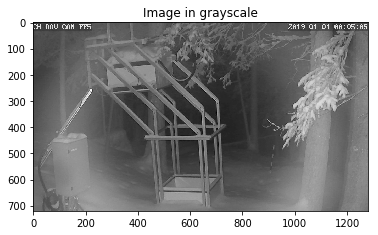

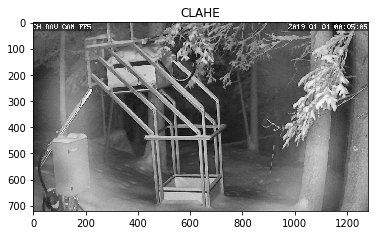

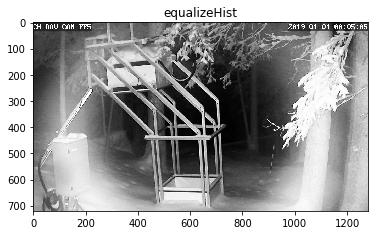

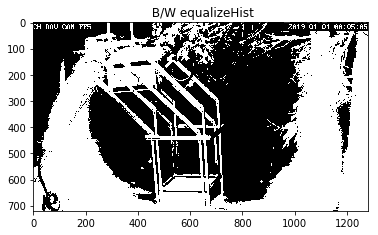

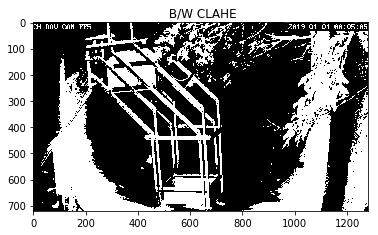

[C:\Users\kkanishk\Desktop\2019\CH-DAV_WEBCAM_FF5_0_1-201901010005.jpg] Blacks: [1080.] / Whites: [200.]


In [7]:
for jpg in found_jpgs:

    # Read file
    gray_img = cv2.imread(jpg, 0)  ## read in grayscale
    plt.imshow(gray_img, cmap="gray")  ## show in grayscale
    plt.title('Image in grayscale')
    plt.show()
    
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    gray_img_clahe_normalized = clahe.apply(gray_img)    
    plt.imshow(gray_img_clahe_normalized, cmap="gray")  ## show in grayscale
    plt.title('CLAHE')
    plt.show()    
    
    
    # Normalize histogram
    gray_img_normalized = cv2.equalizeHist(gray_img)
    plt.imshow(gray_img_normalized, cmap="gray")
    plt.title('equalizeHist')
    plt.show()
    
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W equalizeHist')
    plt.show()
    
    # Create black & white image
    (thresh, bw_img) = cv2.threshold(gray_img_clahe_normalized, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(bw_img, cmap="gray")
    plt.title(' B/W CLAHE')
    plt.show()    
    
    # Calculate and plot histogram
    # https://www.programcreek.com/python/example/89316/cv2.equalizeHist
    hist = cv2.calcHist(bw_img,[0],None,[256],[0,256])
    
    # Print black and white info
    blacks = hist[0]
    whites = hist[-1]
    print('[{}] Blacks: {} / Whites: {}'.format(jpg, blacks, whites))    
    break

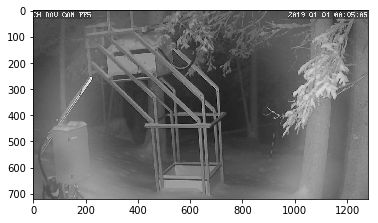

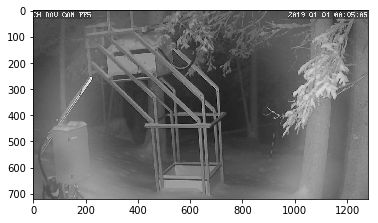

In [8]:
x = gray_img / (256 / 8)
plt.imshow(x, cmap="gray")
plt.show()

x = x * (256 / 400)
plt.imshow(x, cmap="gray")
plt.show()

## Histogram from Snow Region

- *Instead of cropping images, we can use a masked histogram. That is basically calculating the histogram but only for a certain region of the image. With this we can count the number of white pixels in the region of interest, i.e. potential snow cover*
- *Calculate histogram with mask and without mask. Also check third argument for mask*

720


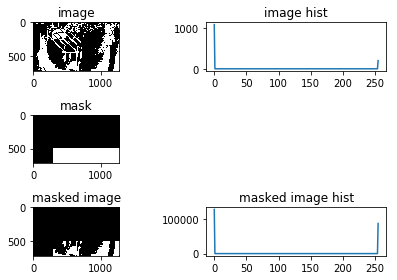

In [9]:
# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
print(len(mask))
mask[500:, 300:] = 255
masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)

plt.subplot(321)
plt.title('image')
plt.imshow(bw_img, 'gray')

plt.subplot(322)
plt.title('image hist')
hist_full = cv2.calcHist(bw_img,[0],None,[256],[0,256])
plt.plot(hist_full)

plt.subplot(323)
plt.title('mask')
plt.imshow(mask, 'gray')

plt.subplot(325)
plt.title('masked image')
plt.imshow(masked_img, 'gray')
plt.subplot(326)
plt.title('masked image hist')
hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
plt.plot(hist_mask)



plt.tight_layout()

In [10]:
snow_pixels = hist_mask[-1]
other_pixels = hist_mask[0]

total_pixels = snow_pixels + other_pixels

fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
print('fraction_white_pixels {}%'.format(fraction_white_pixels))

fraction_white_pixels 40%


## And now for all images from Jan-June 2019
- *Due to camera settings, night images and day images are quite different and cannot be analysed together, so for now we only try to find out as much information as possible from daylight images and thus only doing for 09:05 am, 12:05 pm, 15:05pm*

In [11]:
fraction_white_pixels_all1912 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)  
    if p.stem.endswith('1205'):  ## only noon pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image
        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]
        

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1912.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
        

fraction_white_pixels_all1915 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('1505'):  ## only 15:05 pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1915.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
fraction_white_pixels_all1909 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0905'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1909.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))


 fraction_white_pixels 74%
 fraction_white_pixels 81%
 fraction_white_pixels 78%
 fraction_white_pixels 78%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 78%
 fraction_white_pixels 81%
 fraction_white_pixels 81%
 fraction_white_pixels 79%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 77%
 fraction_white_pixels 78%
 fraction_white_pixels 77%
 fraction_white_pixels 88%
 fraction_white_pixels 76%
 fraction_white_pixels 77%
 fraction_white_pixels 76%
 fraction_white_pixels 77%
 fraction_white_pixels 87%
 fraction_white_pixels 79%
 fraction_white_pixels 88%
 fraction_white_pixels 69%
 fraction_white_pixels 86%
 fraction_white_pixels 81%
 fraction_white_pixels 92%
 fraction_white_pixels 84%
 fraction_white_pixels 84%
 fraction_white_pixels 71%
 fraction_white_pixels 70%
 fraction_white_pixels 70%
 

## Plot for all 09:05am, 12:05pm and 15:05pm images from 2019

181
181
181


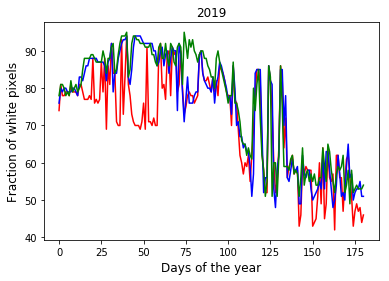

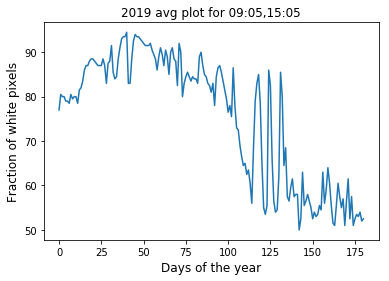

In [19]:
print(len(fraction_white_pixels_all1909))
print(len(fraction_white_pixels_all1912))
print(len(fraction_white_pixels_all1915))
plt.plot(fraction_white_pixels_all1912, 'r') # red for 12:05pm
plt.plot(fraction_white_pixels_all1909, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_all1915, 'g') # green for 15:05pm
plt.title('2019')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avg19=np.zeros(len(fraction_white_pixels_all1909))
for i,snow in enumerate(fraction_white_pixels_all1909):
    fraction_white_pixels_avg19[i]=(fraction_white_pixels_all1909[i] + fraction_white_pixels_all1915[i])/2
plt.plot(fraction_white_pixels_avg19)
plt.title('2019 avg plot for 09:05,15:05')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()


*We see for red colour there are much more fluctuations than green and blue, primarily this is due to overhead sun and camera settings in this light. Thus while analysing the trend, we take avg plot of 09:05 am and 15:05 pm only*

## And now for all images from Jan -June 2018


In [15]:
dir_source = Path('C:/Users/kkanishk/Desktop/2018')  ## note forward slash
print('Source dir: {}\n'.format(dir_source))
filenames = os.listdir(dir_source)
found_jpgs = []

for f in filenames:
    if fnmatch.fnmatch(f, '*.jpg'):
        f = os.path.join(dir_source, f)  ## this works with imread
        found_jpgs.append(f)
print('Found {} JPGs'.format(len(found_jpgs)))

Source dir: C:\Users\kkanishk\Desktop\2018

Found 1448 JPGs


*We are analysing 09:05,noon and 15:05pm pics below*

In [16]:
fraction_white_pixels_all1815 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
    
    if p.stem.endswith('1505'):  ## only 15:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1815.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

fraction_white_pixels_all1812 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)
    
    if p.stem.endswith('1205'):  ## only 15:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1812.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

        
fraction_white_pixels_all1809 = []

# create a mask
mask = np.zeros(bw_img.shape[:2], dtype="uint8")
mask[500:, 300:] = 255


for jpg in found_jpgs:

    p = Path(jpg)

    if p.stem.endswith('0905'):  ## only 09:05am pics
    
        gray_img = cv2.imread(jpg, 0)  ## read in grayscale
        gray_img_normalized = cv2.equalizeHist(gray_img)  ## Normalize histogram
        (thresh, bw_img) = cv2.threshold(gray_img_normalized, 100, 255, cv2.THRESH_BINARY)  ## Create black & white image

        masked_img = cv2.bitwise_and(bw_img,bw_img,mask = mask)
        hist_mask = cv2.calcHist([bw_img],[0],mask,[256],[0,256])  ## note the additional brackets [bw_img]

        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]

        total_pixels = snow_pixels + other_pixels

        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_all1809.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 85%
 fraction_white_pixels 83%
 fraction_white_pixels 86%
 fraction_white_pixels 84%
 fraction_white_pixels 82%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 80%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 79%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 84%
 fraction_white_pixels 83%
 fraction_white_pixels 83%
 fraction_white_pixels 62%
 fraction_white_pixels 66%
 fraction_white_pixels 70%
 fraction_white_pixels 62%
 fraction_white_pixels 65%
 fraction_white_pixels 53%
 fraction_white_pixels 64%
 fraction_white_pixels 56%
 fraction_white_pixels 59%
 fraction_white_pixels 52%
 fraction_white_pixels 83%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 82%
 fraction_white_pixels 83%
 fraction_white_pixels 84%
 

## Plot for all 09:05am, 12:05pm and 15:05pm images from 2018

181
181
181


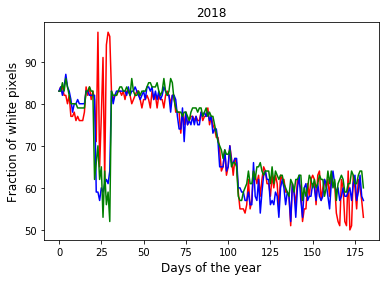

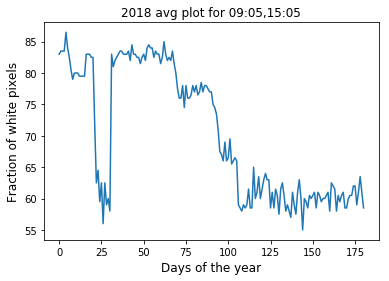

In [18]:
print(len(fraction_white_pixels_all1812))
print(len(fraction_white_pixels_all1809))
print(len(fraction_white_pixels_all1815))
plt.plot(fraction_white_pixels_all1812, 'r') # red for 12:05pm 
plt.plot(fraction_white_pixels_all1809, 'b') # blue for 09:05am
plt.plot(fraction_white_pixels_all1815, 'g') # green for 15:05pm
plt.title('2018')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()
fraction_white_pixels_avg18=np.zeros(len(fraction_white_pixels_all1809))
for i,snow in enumerate(fraction_white_pixels_all1809):
    fraction_white_pixels_avg18[i]=(fraction_white_pixels_all1809[i] + fraction_white_pixels_all1815[i])/2
plt.plot(fraction_white_pixels_avg18)
plt.title('2018 avg plot for 09:05,15:05')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()

## *Looking at some actual images and chceking with the trend shown in plot*

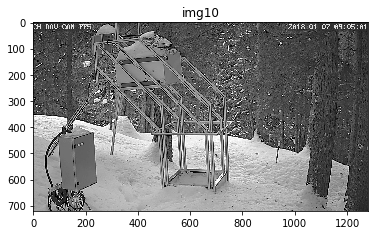

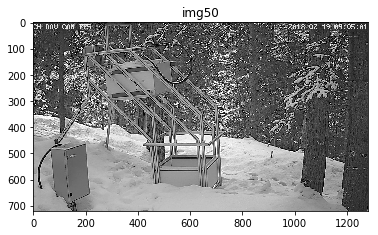

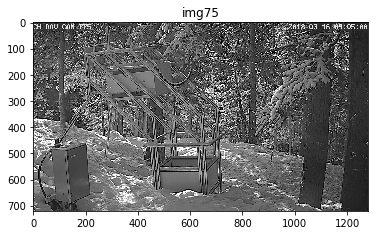

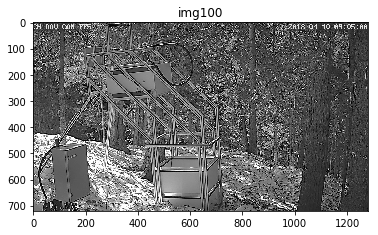

In [20]:
img10=cv2.imread('C:/users/kkanishk/Desktop/2018/CH-DAV_WEBCAM_FF5_0_1-201801070905.jpg',0)
plt.imshow(img10,cmap='gray') 
plt.title('img10')
plt.show()
img50=cv2.imread('C:/users/kkanishk/Desktop/2018/CH-DAV_WEBCAM_FF5_0_1-201802190905.jpg',0)
plt.imshow(img50, cmap='gray') 
plt.title('img50')
plt.show()
img75=cv2.imread('C:/users/kkanishk/Desktop/2018/CH-DAV_WEBCAM_FF5_0_1-201803160905.jpg',0)
plt.imshow(img75, cmap='gray') 
plt.title('img75')
plt.show()
img100=cv2.imread('C:/users/kkanishk/Desktop/2018/CH-DAV_WEBCAM_FF5_0_1-201804100905.jpg',0)
plt.imshow(img100, cmap='gray') 
plt.title('img100')
plt.show()

*We can clearly see how the amount of snow in image no. 10  is more than that in image no. 50 which indeed is more than that in image no. 75 and its least in image no. 100. This is exactly what plot shows.*

# Now comparing the snow at 12:05, 15:05 and 09:05 in two different years
- Red is at 12:05 
- Blue is at 09:05 
- Green is at 15:05
- *over the passing years we can see the curves showing more uncertain patterns pertaining to whats happening to the environment*

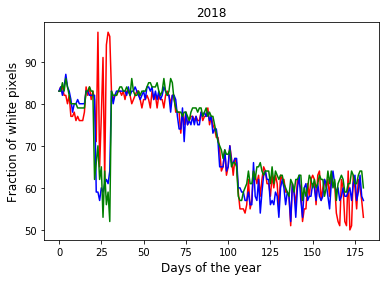

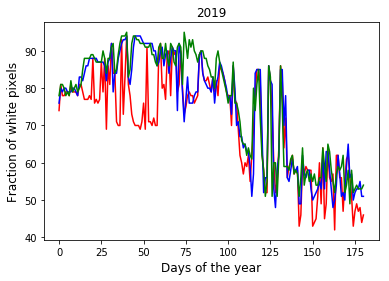

In [21]:
plt.plot(fraction_white_pixels_all1812, 'r')  
plt.plot(fraction_white_pixels_all1809, 'b') 
plt.plot(fraction_white_pixels_all1815, 'g') 
plt.title('2018')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()
plt.plot(fraction_white_pixels_all1912, 'r')  
plt.plot(fraction_white_pixels_all1909, 'b') 
plt.plot(fraction_white_pixels_all1915, 'g') 
plt.title('2019')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()


## *Only June 2018 pics*
*09:05am, noon, 15:05pm*

In [22]:
fraction_white_pixels_june201815=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2018')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('1505'):  ## only 15:05pm pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201815.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

fraction_white_pixels_june201809=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2017')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('0905'):  ## only 09:05am pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201809.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
        
fraction_white_pixels_june201812=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2018')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('1205'):  ## only 12:05pm pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201812.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 52%
 fraction_white_pixels 51%
 fraction_white_pixels 51%
 fraction_white_pixels 55%
 fraction_white_pixels 54%
 fraction_white_pixels 52%
 fraction_white_pixels 47%
 fraction_white_pixels 50%
 fraction_white_pixels 54%
 fraction_white_pixels 49%
 fraction_white_pixels 52%
 fraction_white_pixels 50%
 fraction_white_pixels 52%
 fraction_white_pixels 47%
 fraction_white_pixels 50%
 fraction_white_pixels 50%
 fraction_white_pixels 54%
 fraction_white_pixels 53%
 fraction_white_pixels 48%
 fraction_white_pixels 49%
 fraction_white_pixels 50%
 fraction_white_pixels 49%
 fraction_white_pixels 53%
 fraction_white_pixels 54%
 fraction_white_pixels 51%
 fraction_white_pixels 50%
 fraction_white_pixels 54%
 fraction_white_pixels 54%
 fraction_white_pixels 54%
 fraction_white_pixels 50%
 fraction_white_pixels 51%
 fraction_white_pixels 51%
 fraction_white_pixels 49%
 fraction_white_pixels 52%
 fraction_white_pixels 51%
 fraction_white_pixels 51%
 fraction_white_pixels 48%
 

30
30
22


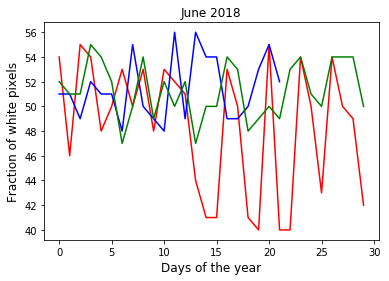

In [23]:
print(len(fraction_white_pixels_june201812))
print(len(fraction_white_pixels_june201815))
print(len(fraction_white_pixels_june201809))
plt.plot(fraction_white_pixels_june201812, 'r') #red is at 12:05 
plt.plot(fraction_white_pixels_june201809, 'b') # blue is at 09:05 
plt.plot(fraction_white_pixels_june201815, 'g') # blue is at 09:05
plt.title('June 2018')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()


# *Only June 2019 Pics*
*09:05, noon and 15:05pm*

In [24]:
fraction_white_pixels_june201915=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2019')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('1505'):  ## only 15:05pm pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201915.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
fraction_white_pixels_june201909=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2017')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('0905'):  ## only 09:05am pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201909.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))
fraction_white_pixels_june201912=[]
dir_source = Path('C:/Users/kkanishk/Desktop/june 2017')
filenames = os.listdir(dir_source)
for filename in filenames:
    p=Path(filename)
    if p.stem.endswith('1205'):  ## only 12:05pm pics
        full_path = dir_source / filename
        full_path=str(full_path)
        im = cv2.imread(full_path)
        im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
        gray_img_clahe_normalized = clahe.apply(im_gray) 
        im_gray = cv2.equalizeHist(im_gray)
        (thresh, blackAndWhiteImage) = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
        hist = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        mask = np.zeros(blackAndWhiteImage.shape[:2],dtype='uint8')
        mask[500:, 300:] = 255
        masked_img = cv2.bitwise_and(blackAndWhiteImage,blackAndWhiteImage,mask = mask)   
        hist_full = cv2.calcHist(blackAndWhiteImage,[0],None,[256],[0,256])
        hist_mask = cv2.calcHist([blackAndWhiteImage],[0],mask,[256],[0,256])
        snow_pixels = hist_mask[-1]
        other_pixels = hist_mask[0]
        total_pixels = snow_pixels + other_pixels
        fraction_white_pixels = int((snow_pixels / total_pixels) * 100)
        fraction_white_pixels_june201912.append(fraction_white_pixels)
        print('{} fraction_white_pixels {}%'.format(jpg[84:], fraction_white_pixels))

 fraction_white_pixels 46%
 fraction_white_pixels 42%
 fraction_white_pixels 41%
 fraction_white_pixels 44%
 fraction_white_pixels 43%
 fraction_white_pixels 55%
 fraction_white_pixels 48%
 fraction_white_pixels 42%
 fraction_white_pixels 55%
 fraction_white_pixels 54%
 fraction_white_pixels 47%
 fraction_white_pixels 44%
 fraction_white_pixels 40%
 fraction_white_pixels 44%
 fraction_white_pixels 49%
 fraction_white_pixels 48%
 fraction_white_pixels 47%
 fraction_white_pixels 53%
 fraction_white_pixels 39%
 fraction_white_pixels 42%
 fraction_white_pixels 45%
 fraction_white_pixels 36%
 fraction_white_pixels 48%
 fraction_white_pixels 39%
 fraction_white_pixels 40%
 fraction_white_pixels 40%
 fraction_white_pixels 40%
 fraction_white_pixels 42%
 fraction_white_pixels 40%
 fraction_white_pixels 41%
 fraction_white_pixels 51%
 fraction_white_pixels 51%
 fraction_white_pixels 49%
 fraction_white_pixels 52%
 fraction_white_pixels 51%
 fraction_white_pixels 51%
 fraction_white_pixels 48%
 

22
30
22


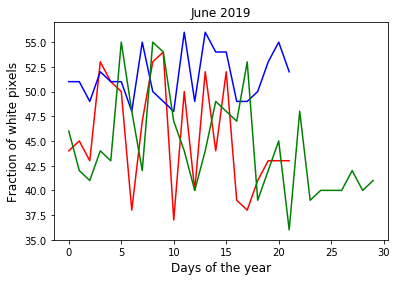

In [25]:
print(len(fraction_white_pixels_june201912))
print(len(fraction_white_pixels_june201915))
print(len(fraction_white_pixels_june201909))
plt.plot(fraction_white_pixels_june201912, 'r') #red is at 12:05 
plt.plot(fraction_white_pixels_june201909, 'b') # blue is at 09:05 
plt.plot(fraction_white_pixels_june201915, 'g') # blue is at 09:05
plt.title('June 2019')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()


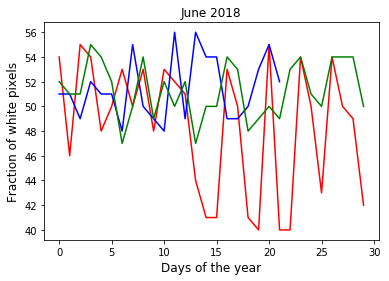

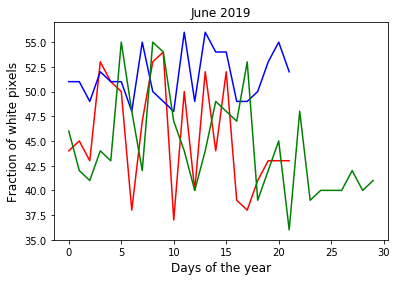

In [26]:
plt.plot(fraction_white_pixels_june201812, 'r')  
plt.plot(fraction_white_pixels_june201809, 'b') 
plt.plot(fraction_white_pixels_june201815, 'g') 
plt.title('June 2018')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()
plt.plot(fraction_white_pixels_june201912, 'r')  
plt.plot(fraction_white_pixels_june201909, 'b') 
plt.plot(fraction_white_pixels_june201915, 'g') 
plt.title('June 2019')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()


*I did only june for both year analysis because I wanted to see the fluctuations in plots when there is absolutely no snow, now if we subtract the two plots, then we will get the fluctuations and trend which is because of snow.*

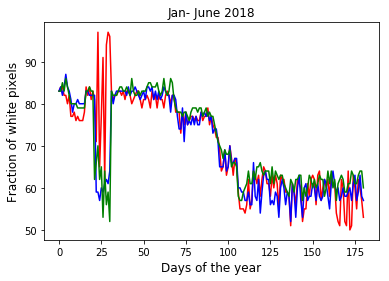

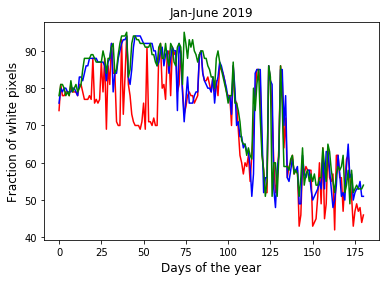

In [27]:
plt.plot(fraction_white_pixels_all1812, 'r')  
plt.plot(fraction_white_pixels_all1809, 'b') 
plt.plot(fraction_white_pixels_all1815, 'g') 
plt.title('Jan- June 2018')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()
plt.plot(fraction_white_pixels_all1912, 'r')  
plt.plot(fraction_white_pixels_all1909, 'b') 
plt.plot(fraction_white_pixels_all1915, 'g') 
plt.title('Jan-June 2019')
plt.xlabel('Days of the year', fontsize=12)
plt.ylabel('Fraction of white pixels', fontsize=12)
plt.show()

## *Finding the fraction of white colours in the black and white image after choosing an appropriate threshold proves to be a very easy, quick and more or less accurate method for getting an estimate of amount of snow cover, as we can see from the images and the plot, they mostly are in sync, more snow in images means more white pixels in plot. On X axis we have days of the year which also is helpful to get rid of leap year chaos, We can see that whenever snow melts, our plots very effectively show it melting by a steep decline in fraction of white pixels. This analysis can be further used when we are dealing with the amount of water in soil and the probable reason for sudden increase in it, if its due to snow melt or not.*
*Choosing an appropriate mask and threshold value is the main checkpoint in this analysis, and its too fast than any other algorithm.*

# ROI OF THE IMAGE AND CONTOURING METHOD
- *Another method on which I worked for determining the amount of snow in the images was to study the snow height from the snow pole which you can find in all images.*
- *At the site there is a wooden pole with yellow markings for different heights on it, the aim was to somehow read the snow height from that pole and it would tell us how much snow was there at a particular time.*
- *For this, we fist have to separate out the ROI( Region of Interest: In our case where the snow pole is installed ) from the image.*
- https://www.youtube.com/watch?v=1pzk_DIL_wo
- *Next would be to highlight the snowpole using contours. Since snowpole is somewhat like a rectangle with boundaries as lines as is seen in images, we chose contours for alphabets as it also has line boundaries.*
- https://cvisiondemy.com/extract-roi-from-image-with-python-and-opencv/
- *Aligning the images : If we chose same forest floor and same chamberCam then all images have almost the same alignment i.e the snow pole would be placed roughly at same location( RANGE OF PIXEL NUMBERS WOULD BE SAME) in all the images but sometimes due to heavy wind or snow, it shifts slightly so as a first step, its important to align the images with each other.*
- https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
- *Once aligned, crop them to ROI.*
- *Loop through the cropped images and find contours in them.: change images to grayscale, binary and dilated images, find contours, sort them anf then choosing the pixel range, hight the snowpole contours.*


## Aligning the images

In [28]:
# Read the images to be aligned
im1 =  cv2.imread('//grasslandserver.ethz.ch/archive/FluxData/CH-DAV_Davos/90_images/40_chambercams/FF5/2019/01/CH-DAV_WEBCAM_FF5_0_1-201901021205.jpg');
im2 =  cv2.imread('//grasslandserver.ethz.ch/archive/FluxData/CH-DAV_Davos/90_images/40_chambercams/FF5/2019/01/CH-DAV_WEBCAM_FF5_0_1-201901021505.jpg');
 
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
 
# Find size of image1
sz = im1.shape
 
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria,im1_gray,5)
#cv::findTransformECC (InputArray templateImage, InputArray inputImage, InputOutputArray warpMatrix, int motionType=MOTION_AFFINE, TermCriteria criteria=TermCriteria(TermCriteria::COUNT+TermCriteria::EPS, 50, 0.001), InputArray inputMask=noArray())
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 
# Show final results
cv2.imshow("Image 1", im1)
cv2.imshow("Image 2", im2)
cv2.imshow("Aligned Image 2", im2_aligned)
cv2.waitKey(0)

-1

## Extracting ROI from the images.
*Based on the range of pixels, we can choose the ROI, Since we are working with the same site, same camera and same floor images, which are aligned, the pixel values are almost the same which stick covers in all the images.*

In [29]:
import numpy as np
import cv2
img = cv2.imread('//grasslandserver.ethz.ch/archive/FluxData/CH-DAV_Davos/90_images/40_chambercams/FF5/2019/01/CH-DAV_WEBCAM_FF5_0_1-201901021505.jpg', cv2.IMREAD_COLOR)
ROI=img[410:650,860:950] ## cropping out the pixel values of interest
cv2.imshow('image',ROI)
cv2.waitKey(0)

    


-1

## Contouring and highlighting the stick
*The contouring method used here is trained for alphabets and mostly highlights the lines in the images but here we face a problem as along with the boundaries of the stick, it also finds the fallen branches etc in the area close to pole.*

In [30]:
# import image
image = cv2.imread('//grasslandserver.ethz.ch/archive/FluxData/CH-DAV_Davos/90_images/40_chambercams/FF5/2019/01/CH-DAV_WEBCAM_FF5_0_1-201901021505.jpg')
ROI=image[460:650,860:950]
image=ROI
# grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# binary
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)


# dilation
kernel = np.ones((10, 1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


# find contours
#image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
ctrs, hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    
    if i>40 and i<60:
        x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
        roi = image[y:y + h, x:x + w]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        if w < 10 and h < 10:
            cv2.imwrite('C:/Users/kkanishk/Desktop/47.jpg'.format(i), roi)

cv2.imshow('marked areas', image)
cv2.waitKey(0)

-1